<a href="https://colab.research.google.com/github/Sourabhpatel1/CapstoneProject-Classification/blob/main/Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Inline Plotting for graphs and visualizations
%matplotlib inline

In [4]:
# Setting notebook figure size for graphs and visualizations
plt.rcParams['figure.figsize'] = (15,8)

# Problem Statement:
### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
---
#***The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ info***rmation.



---


### Data Description 

Demographic:

1.  Sex: male or female("M" or "F")
2.  Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
1. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
2. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can beconsidered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
1. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
2. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
3. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
4. Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
1. Tot Chol: total cholesterol level (Continuous)
2. Sys BP: systolic blood pressure (Continuous)
3. Dia BP: diastolic blood pressure (Continuous)
4. BMI: Body Mass Index (Continuous)
5. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
6. Glucose: glucose level (Continuous)

Predict variable (desired target)
1. 10-year risk of coronary heart disease CHD : (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
# Loding the dataset into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Classification AlmaBetter/cardiovascular/data_cardiovascular_risk.csv')

In [41]:
# Checking the head
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [7]:
# Checking the shape
df.shape

(3390, 17)

In [8]:
# Checking Description of numerical features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Checking the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
# Checking number of null values in the column
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

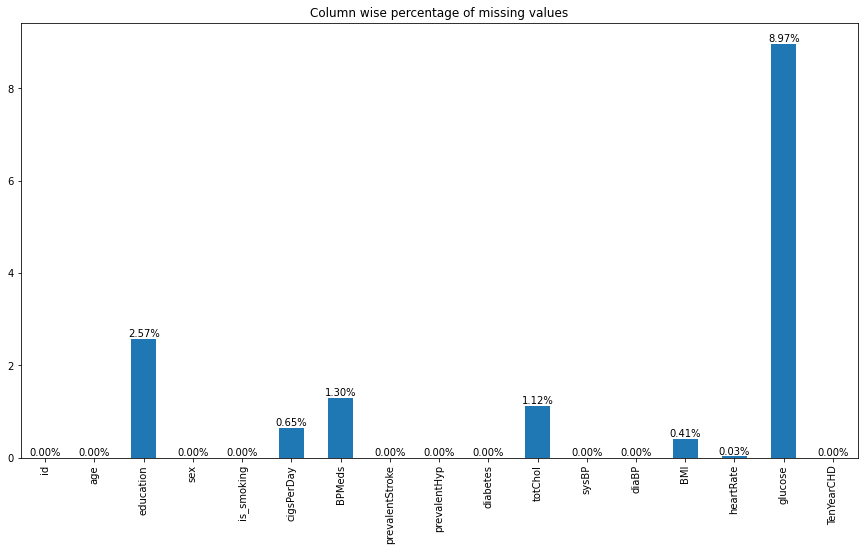

In [11]:
# plotting percentage of null values
nulls = round((df.isna().sum()/df.shape[0])*100,2)
fig, ax = plt.subplots()
ax.set_title('Column wise percentage of missing values')
nulls.plot.bar()
ax.bar_label(ax.containers[0], fmt="%.2f%%");

## if there is an error running this cell, update the matplotlib libraray to the latest version >= 3.5.0

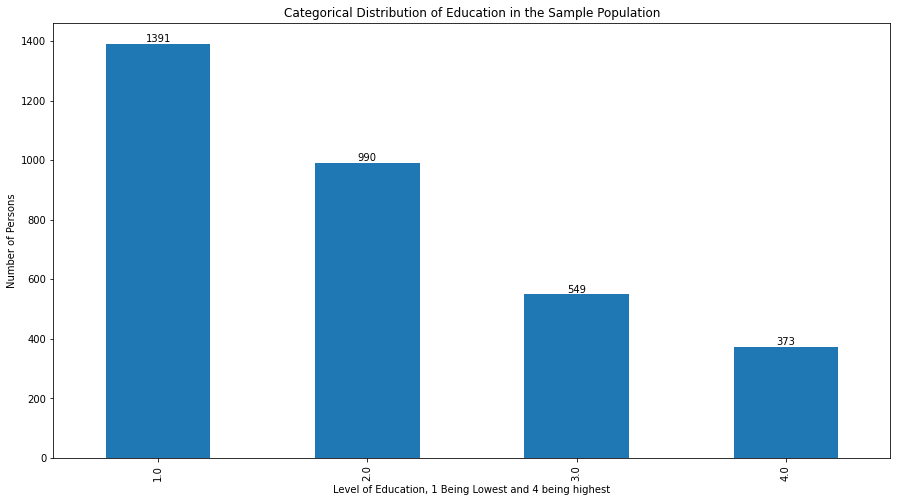

In [12]:
# checking the columns with missing values.
# Checking the Distribution of Education
fig, ax = plt.subplots()
df['education'].value_counts().plot(kind='bar')
ax.set_title('Categorical Distribution of Education in the Sample Population')
ax.set_ylabel('Number of Persons')
ax.set_xlabel('Level of Education, 1 Being Lowest and 4 being highest')
ax.bar_label(ax.containers[0]);

In [24]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

Number of Smokers vs Number of Non Smokers
_________________________________

NO     1703
YES    1687
Name: is_smoking, dtype: int64 
_________________________________
_________________________________

Percentage of Smokers Vs Non Smokers


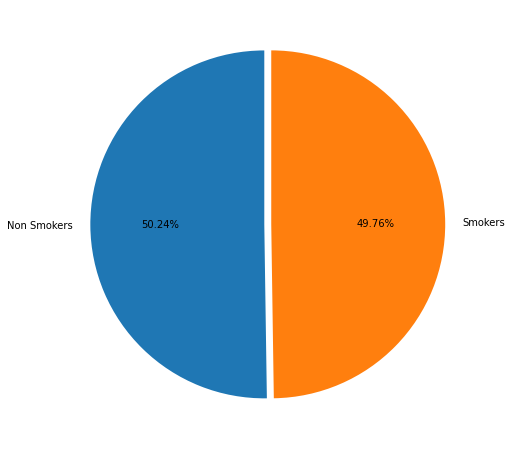

In [40]:
# Smoking Population vs Non Smoking Population
print("Number of Smokers vs Number of Non Smokers" + "\n" + "___"*11 + "\n")
print(df['is_smoking'].value_counts(), "\n" + "___"*11)
print("___"*11 + "\n")
print("Percentage of Smokers Vs Non Smokers")
plt.pie(df['is_smoking'].value_counts(), startangle=90, explode=[0.02,0.02],
        autopct="%.2f%%", labels=['Non Smokers', "Smokers"]);

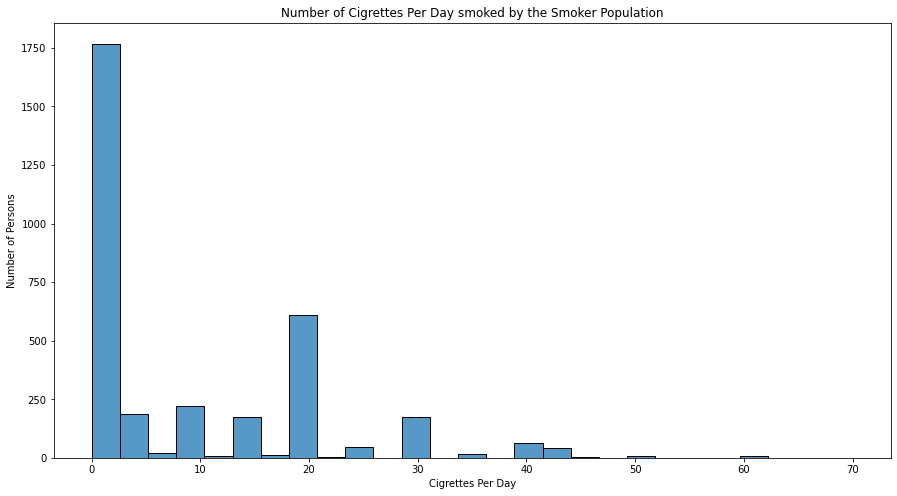

In [13]:
# Checking the Distribution of Cigrettes Smoked per day by the smiking population.
fig, ax = plt.subplots()
sns.histplot(df['cigsPerDay'])
ax.set_title('Number of Cigrettes Per Day smoked by the Smoker Population')
ax.set_ylabel('Number of Persons')
ax.set_xlabel('Cigrettes Per Day');

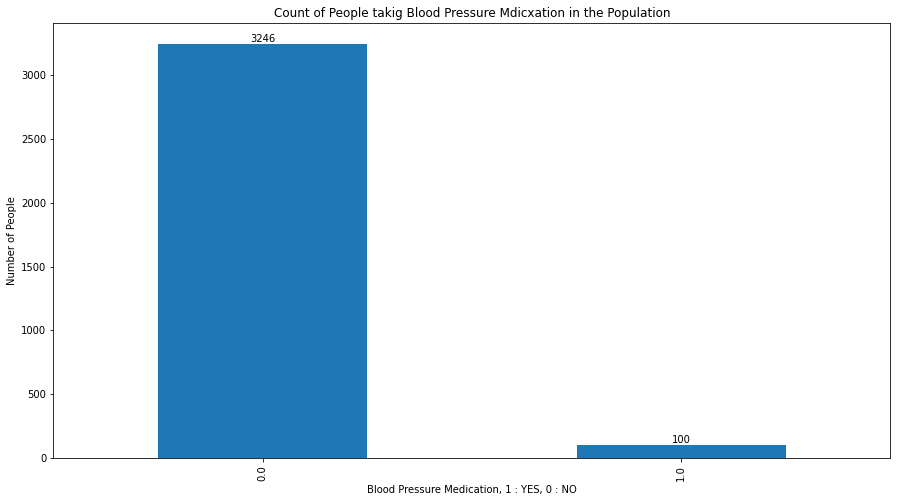

In [14]:
# Number of People Taking Blood Pressure Medication.
fig, ax = plt.subplots()
df['BPMeds'].value_counts().plot.bar()
ax.set_title('Count of People takig Blood Pressure Mdicxation in the Population')
ax.set_ylabel('Number of People')
ax.set_xlabel('Blood Pressure Medication, 1 : YES, 0 : NO')
ax.bar_label(ax.containers[0]);

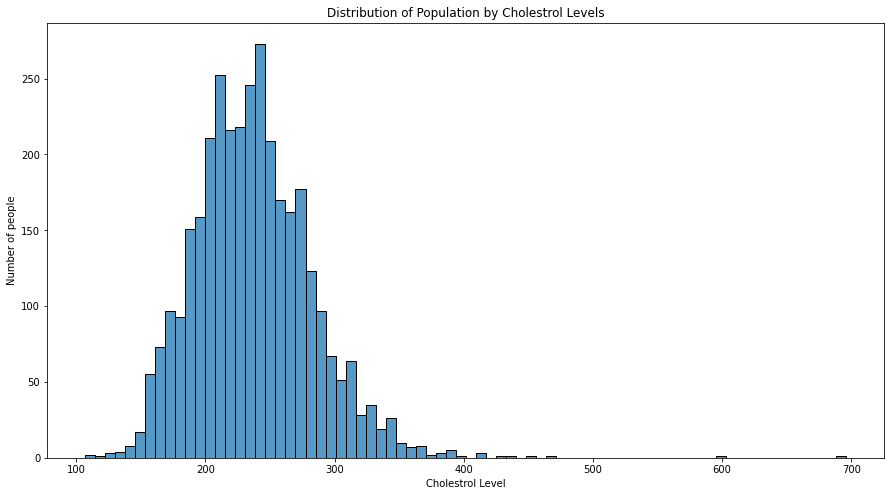

In [15]:
# Distribution of Population by Cholestrol Level
fig, ax = plt.subplots()
sns.histplot(df['totChol'])
ax.set_title('Distribution of Population by Cholestrol Levels')
ax.set_ylabel('Number of people')
ax.set_xlabel('Cholestrol Level');

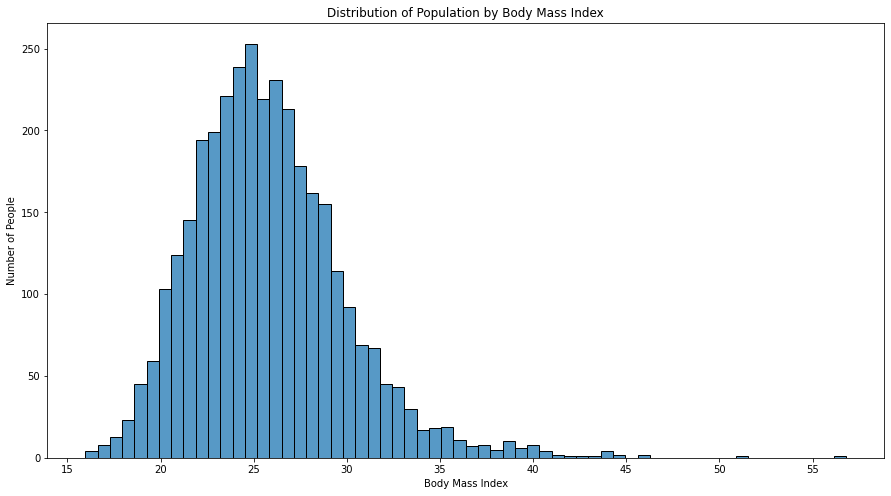

In [16]:
# Distribution of Population by Body Mass Index.
fig, ax = plt.subplots()
sns.histplot(df['BMI'])
ax.set_title('Distribution of Population by Body Mass Index')
ax.set_ylabel('Number of People')
ax.set_xlabel('Body Mass Index');

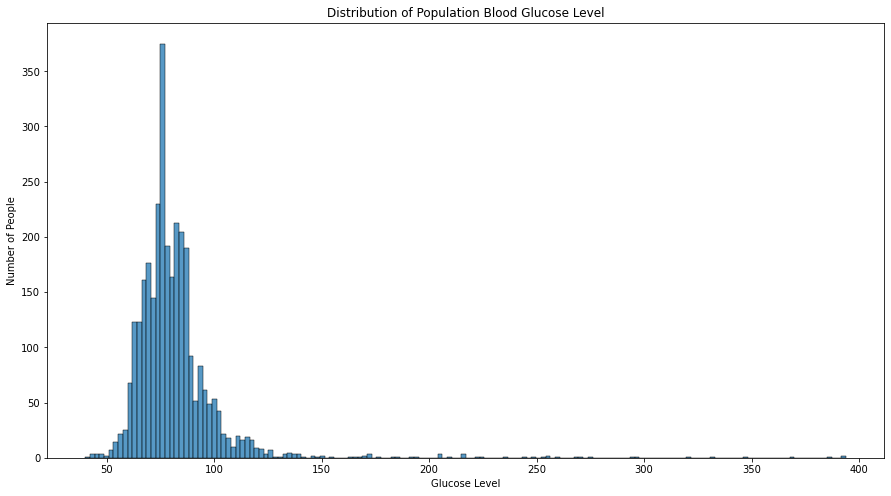

In [17]:
# Distribution of Population by the Blood Glucose Level.
fig, ax = plt.subplots()
sns.histplot(df['glucose'])
ax.set_title('Distribution of Population Blood Glucose Level')
ax.set_ylabel('Number of People')
ax.set_xlabel('Glucose Level');

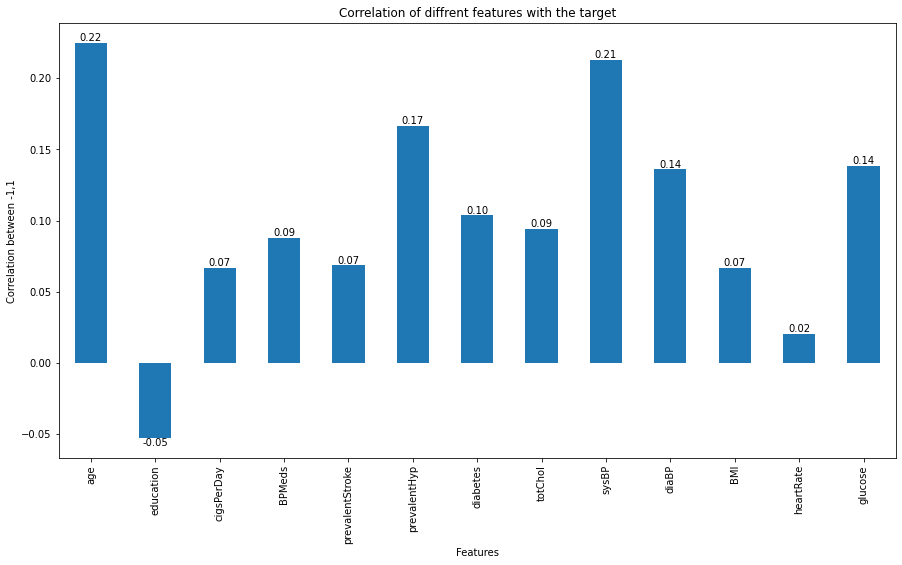

In [18]:
# Checking the correlation of diffrent columns with the target variable
fig, ax = plt.subplots()
df[[col for col in df.columns if col not in ['TenYearCHD', 'id']]].corrwith(df['TenYearCHD']).plot.bar()
ax.bar_label(ax.containers[0], fmt="%.2f") 
ax.set_title('Correlation of diffrent features with the target')
ax.set_ylabel('Correlation between -1,1')
ax.set_xlabel('Features');

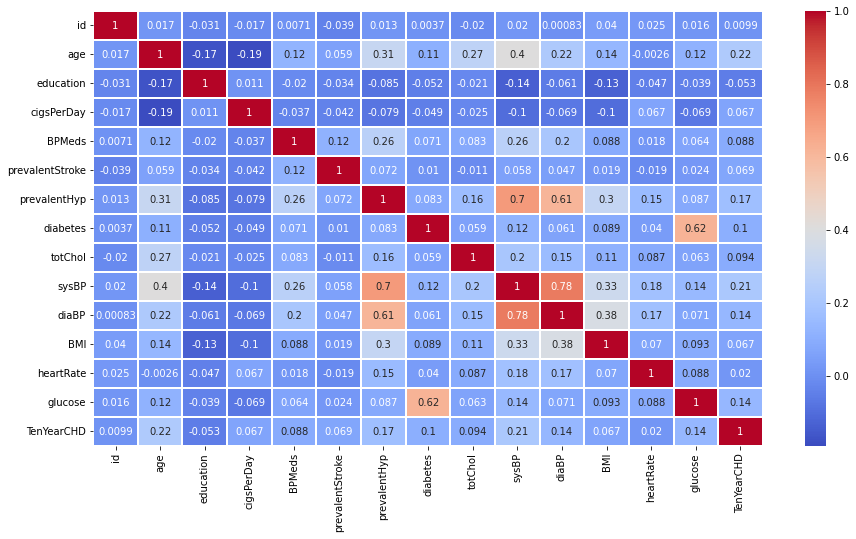

In [19]:
# Plotting the correlation matrix to check for inter-feature and intra-feature correlation
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    linewidth=2
);

# <u><b>Observations on the dataset</b></u>
1. There are 3390 rows consisting of medical and demographic details of sample population.
2. Mean age of the sample population is 49.54 years and median age is 49 years.
3. Range of age is from 32 to 70 years.
4. There are two categorical features Sex (Male or Female) and is smoking (yes and no)
5. BPmeds, Prevalant Stroke, Prevalant Hypertension and Diabetes are nominal features where 1 being yes and 0 being no.
6. Rest all others are continuous numerical features.
7. Education, cigsPerDay, BPMeds, totChol, BMI, heartrate and glucose has missing values
8. Glucose and Education has 8.97% and 2.57% missing data respectively.
9. Other missing values range between 0.5% to 1.15% except heart-rate which has only one missing row.
10. PrevelantHyp, sysBP, diaBP are highly correlated with each other.
11. Glucose and Diabetes also have a high degree of correlation.

# <u><b>Preprocessing, feature-engineering and dropping of unwanted/redundant data.</u></b>
1. No information on the eductation has been provided in the dataset's description. But from the distribution it is clear that the education ranges from 1 to 4 where 1 is the lowest level of education and 4 is the heighest.
2. There if a slight negetive correlation between education and 10 yearchd, suggesting that as the level of education increases the risk of coronary heart disease decreases, although very slightly.
3. Education is missing in 87 rows. Which is around 2.5% of the data. We can drop these rows. 
4. The population is almost equally divided betwee smokers and non smokers the percentage of smokers and non smokers is 49.76% and 50.24% respectively.
5. There are 22 rows missing information on cigsPerDay, it can be assumed that they are non smokers or smokers as both are equally likely. Here we'll assume that they are non-smokers.
6. BP Meds is missing 44 rows we can drop these as well.
7. totChol is missing 38 rows we can drop these rows.
8. BMI and Heart Rate is missing 14 and 1 row thus these will be dropped as well.
9. Glucose level in the population ranges from 40 to 394.
10. 

<AxesSubplot:xlabel='sysBP', ylabel='Count'>

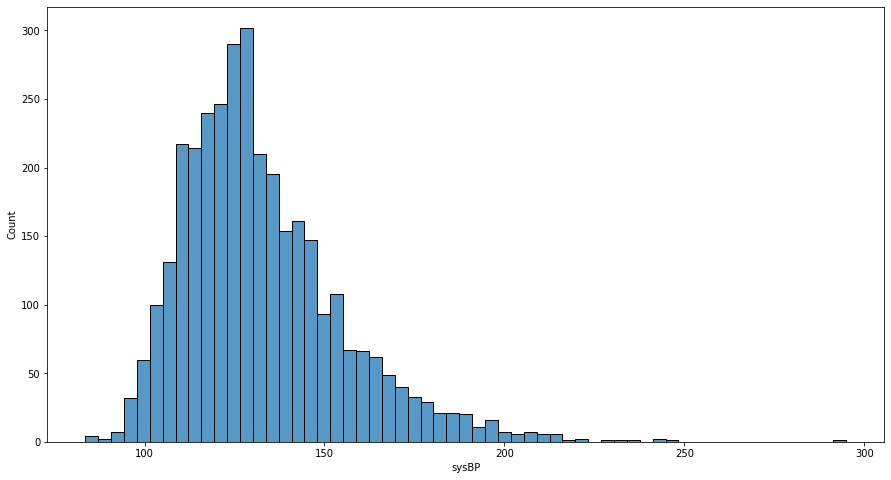

In [20]:
sns.histplot(df['sysBP'])

<AxesSubplot:xlabel='diaBP', ylabel='Count'>

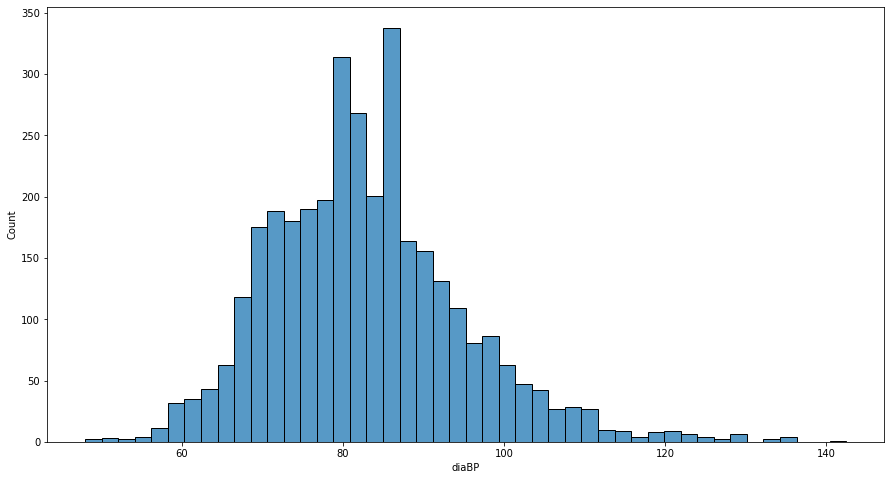

In [21]:
sns.histplot(df['diaBP'])

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

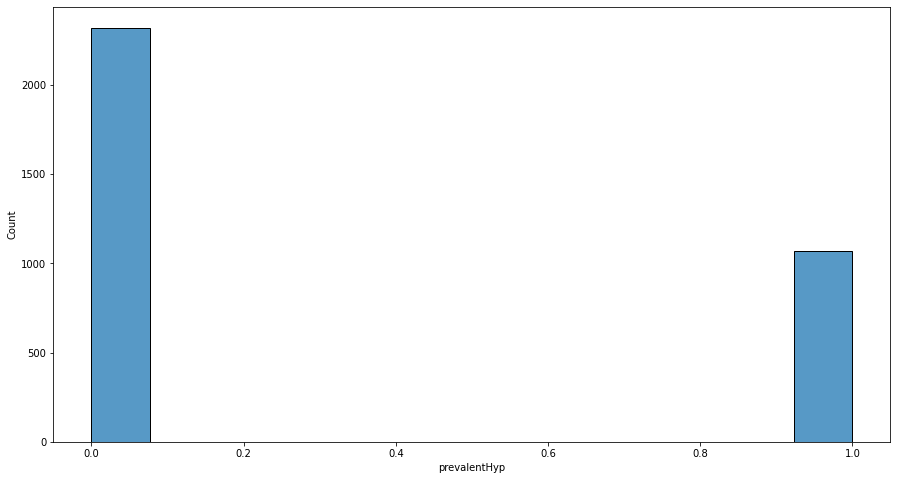

In [22]:
sns.histplot(df['prevalentHyp'])